In [4]:
# Libs

from ISLP import load_data
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from ISLP.models import (ModelSpec as MS, summarize , poly)

# Questão 5

# a)

In [5]:
np.random.seed(1)
df = load_data('Default')

In [6]:
df_5 = df[['default', 'income', 'balance']].copy()
df_5['default'] = pd.get_dummies(df_5['default'], prefix='default', drop_first=True)


x_train = df_5[['income', 'balance']].copy()
y_train = df_5['default'].copy()

model = sm.Logit(y_train, x_train).fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


c:\Users\Josino\miniconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\Josino\miniconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


# b)

# i.

In [7]:
x_train, x_test, y_train, y_test = train_test_split(df_5[['income', 'balance']], df_5['default'], test_size=0.33, random_state=42)

# ii.

In [8]:
model = sm.Logit(y_train, x_train).fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


c:\Users\Josino\miniconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\Josino\miniconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


# iii.

In [9]:
iii_group = pd.DataFrame()

iii_group['default'] = (model.predict(x_test) > 0.5).astype(int)

# iv.

In [10]:
accuracy = accuracy_score(y_test, iii_group.default)

print(f'Nosso modelo teve uma accuracy de: {accuracy}')

Nosso modelo teve uma accuracy de: 0.9663636363636363


# c)

In [12]:
for i in range(3):
    x_train, x_test, y_train, y_test = train_test_split(df_5[['income', 'balance']], df_5['default'], test_size=0.33)

    iii_group = pd.DataFrame()
    iii_group['default'] = (model.predict(x_test) > 0.5).astype(int)
    accuracy = accuracy_score(y_test, iii_group.default)

    print(f'Nosso modelo teve uma accuracy de: {accuracy}\n')

"""
Aparentemente os resultados sempre são bem positivos (accuracy alta, independente da amostra retirada)

Nosso modelo teve uma accuracy de: 0.9696969696969697

Nosso modelo teve uma accuracy de: 0.9687878787878788

Nosso modelo teve uma accuracy de: 0.9648484848484848



# d)

In [ ]:
df['student'] = pd.get_dummies(df['student'], drop_first=True).astype(int)

df_5['student'] = df['student']

x_train, x_test, y_train, y_test = train_test_split(df_5[['income', 'balance', 'student']], df_5['default'], test_size=0.33)

model = sm.Logit(y_train, x_train).fit()

d_group = pd.DataFrame()
d_group['default'] = (model.predict(x_test > 0.5)).astype(int)

accuracy = accuracy_score(y_test, d_group.default)

print(accuracy)

"""
Continuou com valors próximos aos que já estavam

Optimization terminated successfully.
         Current function value: 0.129210
         Iterations 9
0.9718181818181818


# Questão 6

# a)

In [ ]:
np.random.seed(1)
df = load_data('Default')

y_train = df['default'].copy()
y_train = pd.get_dummies(y_train, drop_first=True).astype(int)
x_train = df[['income', 'balance']].copy()

x_train = sm.add_constant(x_train)

model = sm.GLM(y_train, x_train, family=sm.families.Binomial()).fit()

print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    Yes   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9997
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -789.48
Date:                Tue, 03 Oct 2023   Deviance:                       1579.0
Time:                        10:32:21   Pearson chi2:                 6.95e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1256
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.0

# b)

In [ ]:
# Função do bootstrap
def boot_fn(df, index):
    # Pegando uma sample aleatória do dataset
    data_df = df.iloc[index]

    # Modelo Logistic Regression
    y_train = data_df['default']
    x_train = data_df[['income', 'balance']]

    x_train = sm.add_constant(x_train)

    model = sm.Logit(y_train, x_train).fit(disp=0)
    
    return model.params['income'], model.params['balance']

# c)

In [ ]:
df['default'] = pd.get_dummies(df['default'], drop_first=True).astype(int)

# N de repetições
repeat_times = 1000

# Arrays de valores para income e balance
income_coefs = []
balance_coefs = []

# Mágica
for _ in range(repeat_times):
    index = np.random.randint(0, len(df), len(df))
    income_coef, balance_coef = boot_fn(df, index)
    income_coefs.append(income_coef)
    balance_coefs.append(balance_coef)

In [ ]:
std_income = np.std(income_coefs)
std_balance = np.std(balance_coefs)

print(f'Standard error for Income = {std_income}')
print(f'Standard error for Balance = {std_balance}')

Standard error for Income = 4.929933743996096e-06
Standard error for Balance = 0.00022260509699016862


# d)

In [ ]:
"""
Deu valores bem próximos

# Questão 7

# a)

In [ ]:
df = load_data('Weekly')

y_train = pd.get_dummies(df['Direction'], drop_first=True).astype(int)
x_train = df[['Lag1', 'Lag2']].copy()
x_train = sm.add_constant(x_train)

model = sm.GLM(y_train, x_train, family=sm.families.Binomial()).fit()

print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     Up   No. Observations:                 1089
Model:                            GLM   Df Residuals:                     1086
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -744.11
Date:                Wed, 04 Oct 2023   Deviance:                       1488.2
Time:                        09:12:21   Pearson chi2:                 1.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.007303
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2212      0.061      3.599      0.0

# b)

In [ ]:
y_train = pd.get_dummies(df['Direction'].iloc[1:], drop_first=True).astype(int)
x_train = df[['Lag1', 'Lag2']].iloc[1:].copy()
x_train = sm.add_constant(x_train)

model = sm.GLM(y_train, x_train, family=sm.families.Binomial()).fit()

print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     Up   No. Observations:                 1088
Model:                            GLM   Df Residuals:                     1085
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -743.26
Date:                Wed, 04 Oct 2023   Deviance:                       1486.5
Time:                        09:12:22   Pearson chi2:                 1.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.007373
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2232      0.061      3.630      0.0

# c)

In [ ]:
x_new = df[['Lag1', 'Lag2']].iloc[0].copy()
x_new = np.insert(x_new, 0, 1)

prediction_prob = model.predict(x_new)
prediction = 'Up' if prediction_prob > 0.5 else 'Down'

actual_direction = df['Direction'][0]

answer = print('Correct') if actual_direction == prediction else print('False')

False


# d)

In [ ]:
correct_answer = []

for i in range(len(df) - 1):
    train = df.drop(index=i)
    test = df.iloc[[i]]

    x_train = train[['Lag1', 'Lag2']].copy()
    x_train = sm.add_constant(x_train)
    y_train = train['Direction'].copy()
    y_train = pd.get_dummies(y_train, drop_first=True).astype(int)

    x_test = test[['Lag1', 'Lag2']]
    x_test = np.insert(x_test, 0, 1)

    model = sm.Logit(y_train, x_train).fit(disp=0)

    posterior_prob = model.predict(x_test)

    pred = 'Up' if posterior_prob > 0.5 else 'Down'
    
    df['Direction'] == pred if correct_answer.append(0) else correct_answer.append(1)

# e)

In [ ]:
np.mean(correct_answer)

"""
LOOCV estimate test error deu 0.5, ou seja, nosso modelo não performa muito bem para os dados
de teste (coisa essa que é normal de ocorrer, já que treinamos usando apenas os de treino)

0.5

# Questão 8

# a)

In [ ]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

"""
F(x) = B_0 + B_1_x + e
F(x) = B_0 + x + e

# b)

<Axes: >

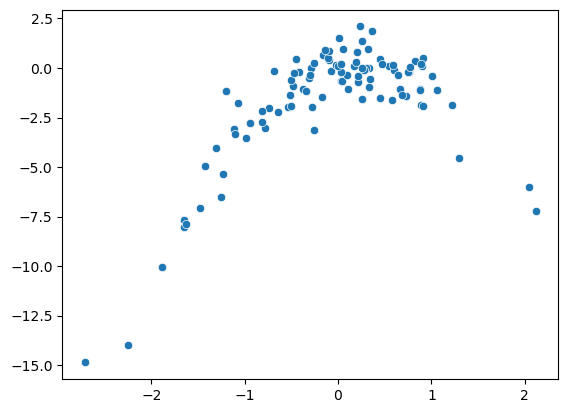

In [ ]:
sns.scatterplot(x = x, y = y)

"""
Formou uma parábola, coisa essa que evidencia que devemos usar um modelo
mais flexível com uma abordagem quadrática

# c)

In [ ]:
def create_data_with_seed(seed):
    rng = np.random.default_rng(seed)
    x = rng.normal(size=100)
    y = x - 2 * x**2 + rng.normal(size=100)

    def apply_loocv(x, y):
        loo = LeaveOneOut()
        loo.get_n_splits(x)
        loo_list = []

        for i, (train_index, test_index) in enumerate(loo.split(x)):
            x_train, x_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]

            model = sm.OLS(y_train, x_train).fit()

            y_pred = model.predict(x_test)

            error = mean_squared_error(y_test, y_pred)
            loo_list.append(error)
        return np.mean(loo_list)

    x1 = sm.add_constant(x)
    x2 = sm.add_constant(np.column_stack((x, x**2)))
    x3 = sm.add_constant(np.column_stack((x, x**2, x**3)))
    x4 = sm.add_constant(np.column_stack((x, x**2, x**3, x**4)))

    error1 = apply_loocv(x1, y)
    error2 = apply_loocv(x2, y)
    error3 = apply_loocv(x3, y)
    error4 = apply_loocv(x4, y)

    return print(f'df1 = {error1}\ndf2 = {error2}\ndf3 = {error3}\ndf4 = {error4}')

create_data_with_seed(1)

df1 = 6.633029839181983
df2 = 1.122936856341969
df3 = 1.3017965489358867
df4 = 1.3323942694179325


# d)

In [ ]:
create_data_with_seed(2)

"""
Não são so mesmos, já que agora os números parcialmente randômicos são diferentes

df1 = 7.56060369435858
df2 = 0.9840371744582573
df3 = 0.9682355765918602
df4 = 0.9659585554875675


# e)

In [ ]:
"""
O que teve a menor média de erro foi o IV, sim. Quando plottei X em relação a Y, pude
notar que a relação entre os dados era distante de Linear, precisando assim, que usássemos
um modelo mais flexível, diferente da abordagem do I, que é linear, mas também, não esperava
que o erro diminuisse muito após passarmos da abordagem quadrática, já que os dados seguiam
um formato próximo ao de uma parábola

# f)

In [ ]:
"""
As estimativas são boas para descobrirmos se o modelo está adequado aos dados, pois, muitas vezes,
ao treinarmos o modelo, ele pode se sair muito bem apenas com os dados de treino, mas ao apresentarmos
real world problems, ele pode acabar sendo ruim, então essa validação é importante. Os resultados
condizem com o que a análise exploratória nos indicou. Um formato de uma parábola na relação entre os
dados

# Questão 9

# a)

In [ ]:
df = load_data('Boston')

est_mean = df['medv'].mean()

# b)

In [ ]:
est_ste = (np.std(df['medv']) / np.sqrt(len(df['medv'])))

print(est_ste)

0.4084569346972867


# c)

In [ ]:
n = len(df.medv)

def bootstrap(data, n):
    return np.random.choice(data, size=n , replace=True)

bootstrap_num = 1000

bootstrap_means = [np.mean(bootstrap(df.medv, n)) for _ in range(bootstrap_num)]

bootstrap_ste = np.std(bootstrap_means)

print(bootstrap_ste)

"""
São valores bem próximos

0.40242981708806935


# d)

In [ ]:
interval1 = [est_mean - 2 * est_ste, est_mean + 2 * est_ste]

interval2 = [est_mean - 2 * bootstrap_ste, est_mean + 2 * bootstrap_ste]

print(interval1, interval2)

"""
Ambos intervalos são muito próximos, tendo apenas uma diferença de 1.68 entre eles

[21.715892454716105, 23.34972019350525] [21.69279722728823, 23.372815420933122]


# e)

In [ ]:
np.median(df.medv)

21.2

# f)

In [ ]:
n = len(df.medv)

def bootstrap(data, n):
    return np.random.choice(data, size=n , replace=True)

bootstrap_num = 1000

bootstrap_means = [np.median(bootstrap(df.medv, n)) for _ in range(bootstrap_num)]

bootstrap_ste = np.std(bootstrap_means)

print(bootstrap_ste)

"""
Isso representa que a média tem uma variabilidade de 0.37 do True Population Median

0.3701049040474873


# g)

In [ ]:
medv_mean_0.1 = np.percentile(df.medv, 10)

12.75

# h)

In [ ]:
n = len(df.medv)

def bootstrap(data, n):
    return np.random.choice(data, size=n , replace=True)

bootstrap_num = 1000

bootstrap_means = [np.percentile(bootstrap(df.medv, n), 10) for _ in range(bootstrap_num)]

bootstrap_ste = np.std(bootstrap_means)

print(bootstrap_ste)

"""
Podemos esperar uma variação de 0.5 no 10° Percentile

0.5040103148746065
